### What is Resume Screening

*Resume screening is the initial step in the hiring process, where resumes are evaluated to identify qualified candidates based on their skills, qualifications, and experience, enabling employers to shortlist potential candidates for further consideration.*

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**In this section, we will explore the Python implementation of resume screening, breaking it down into step-by-step instructions for effective evaluation of resumes.**

### 1- Importing Packages
*We will begin by Importing necessary packages required for this task*

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [7]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### 2 - Exploratory Data Analysis

In [4]:
!unzip '/content/drive/MyDrive/resume_NLP/UpdatedResumeDataSet.csv.zip' -d '/content/drive/MyDrive/resume_NLP/resume_nlp'

Archive:  /content/drive/MyDrive/resume_NLP/UpdatedResumeDataSet.csv.zip
  inflating: /content/drive/MyDrive/resume_NLP/resume_nlp/UpdatedResumeDataSet.csv  


In [8]:
resume_data = pd.read_csv(r'/content/drive/MyDrive/resume_NLP/resume_nlp/UpdatedResumeDataSet.csv')

In [10]:
resume_data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [11]:
resume_data.shape

(962, 2)

In [12]:
resume_data.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


#### Bar Plot

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent.

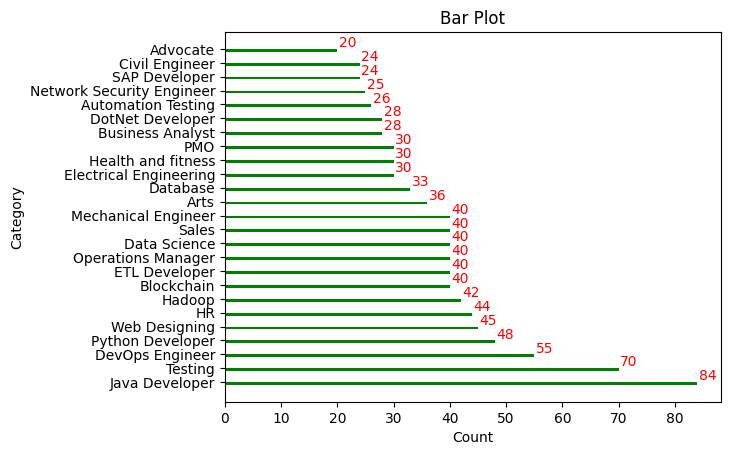

In [18]:

a = resume_data.Category.value_counts()

x = list(a.index)
y = list(a)

fig, ax = plt.subplots()
width = 0.20 # the width of the bars
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='red')
plt.title('Bar Plot')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


We can clearly see that the top category in this dataset is "Java Developer"

#### Pie Chart

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data. The slices of pie are called wedges. The area of the wedge is determined by the length of the arc of the wedge. The area of a wedge represents the relative percentage of that part with respect to whole data. Pie charts are commonly used in business presentations like sales, operations, survey results, resources, etc as they provide a quick summary.

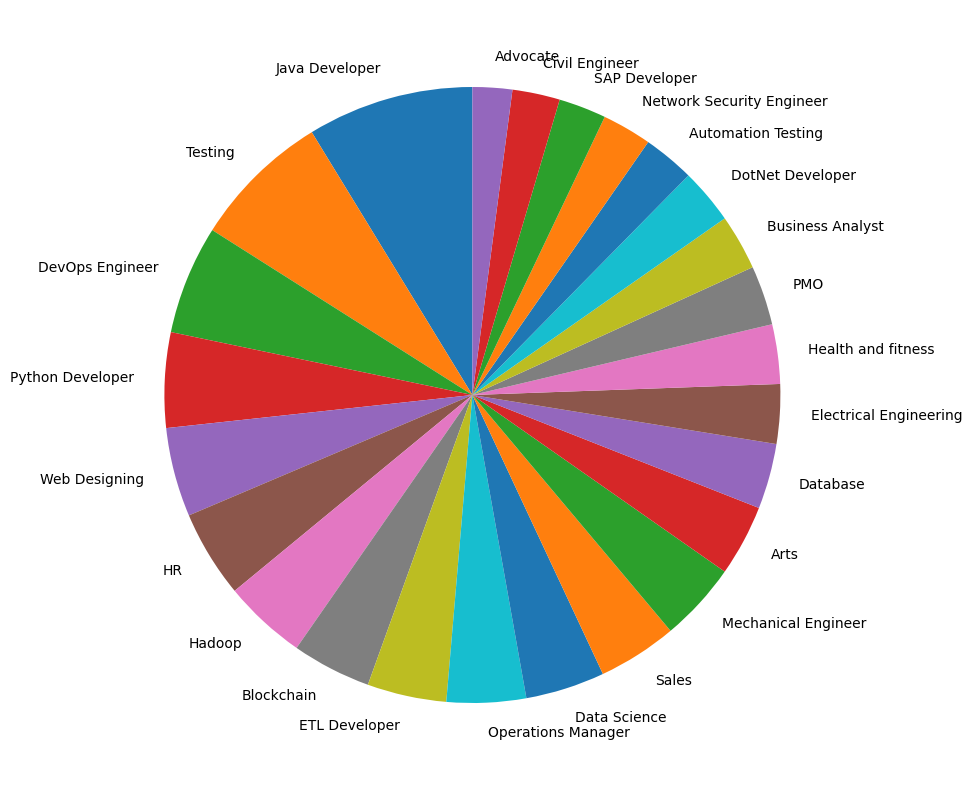

In [19]:
fig = plt.figure(figsize =(12, 10))
plt.pie(y, labels = x, startangle = 90)
plt.show()

### 3 - Data Processing

In this step, we remove any unnecessary information from resumes like URLs, hashtags, and special characters.

#### Step 1 - Clean the 'Resume' Column

In [20]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText)
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [21]:
resume_data['cleaned_resume'] = resume_data.Resume.apply(lambda x: cleanResume(x))

In [23]:
resume_data.head(3)

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skill Programming Language P thon panda ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Detail Ma 2013 to Ma 2017 B E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Area of Intere t Deep Learning Control S te...


#### Step 2 - Encode 'Category' Column

Now we will encode **Category** column using *LabelEncoder* which is part of *sklearn*. This will encode eaxh category into a class(number) and it will become multi-class classification.

In [25]:
var_mod = ['Category']
for i in var_mod:
  print(i)

Category


In [24]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resume_data[i] = le.fit_transform(resume_data[i])

In [ ]:
resume_data["Category"]

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

#### Step 3 - Preprocess the 'cleaned_resume' column

Now its time to preprocess the *cleaned_resume* column and to convert it into vectors. There are a lot of techniques to do it but now we are using **Td-Idf** for this purpose. We will use **TfidfVectorizer** from *sklearn*.

In [26]:
requiredText = resume_data['cleaned_resume'].values

In [43]:
requiredText[0:3]

array(['Skill    Programming Language   P thon  panda   nump    cip    cikit learn  matplotlib   Sql  Java  JavaScript JQuer     Machine learning  Regre ion  SVM  Na  ve Ba e   KNN  Random Fore t  Deci ion Tree   Boo ting technique   Clu ter Anal  i   Word Embedding  Sentiment Anal  i   Natural Language proce ing  Dimen ionalit  reduction  Topic Modelling  LDA  NMF   PCA   Neural Net     Databa e Vi uali ation   M  ql  SqlServer  Ca andra  Hba e  Ela ticSearch D3 j   DC j   Plotl   kibana  matplotlib  ggplot  Tableau    Other   Regular Expre ion  HTML  CSS  Angular 6  Log ta h  Kafka  P thon Fla k  Git  Docker  computer vi ion   Open CV and under tanding of Deep learning Education Detail      Data Science A urance A ociate     Data Science A urance A ociate   Ern t   Young LLP  Skill Detail    JAVASCRIPT  Exprience   24 month   jQuer   Exprience   24 month   P thon  Exprience   24 month Compan  Detail    compan    Ern t   Young LLP  de cription   Fraud Inve tigation  and Di pute Servic

In [29]:
requiredTarget = resume_data['Category'].values

In [42]:
requiredTarget [0:5]

array([6, 6, 6, 6, 6])

In [31]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)

In [32]:
word_vectorizer.fit(requiredText)

TfidfVectorizer(max_features=1500, stop_words='english', sublinear_tf=True)

In [33]:
WordFeatures = word_vectorizer.transform(requiredText)

In [34]:
WordFeatures

<962x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 124956 stored elements in Compressed Sparse Row format>

### 4 - Model Building

#### Split the Data

But, First we have to split the data into train and validation. We will use 80% data for training and 20% data for validation. Let’s split the data now into training and test set.

In [35]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)

In [36]:
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


Now its time to build the model. We are using **KNeighborsClassifier** to build this model for multi class classification

In [37]:
clf = KNeighborsClassifier()

In [38]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
prediction = clf.predict(X_test)

### 5 - Results

Now its time to see how well our model performed.

In [40]:
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99


We can see that results are awesome. We are able to classify each Category of a given resume with 99% accuracy.

In [41]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00         3
          17       1.00    